<a href="https://colab.research.google.com/github/VineetMakharia/NN-ipynbs/blob/main/IOT_Proj5_vrmakhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task1 - Generating Data





In [ ]:
# Need to generate 1 step transition matrix P
import numpy as np
from random import seed,random
seed(200305247)

pij = [[random() for i in range(4)] for j in range(4)]
bi = [[random() for i in range(3)] for j in range(4)]
pij = np.array(pij)
bi = np.array(bi)

In [ ]:
pij_normalized = pij/pij.sum(axis=1,keepdims=1)
bi_normalized = bi/bi.sum(axis=1,keepdims=1)

In [ ]:
pij_normalized

array([[0.34939871, 0.27201376, 0.06268074, 0.31590679],
       [0.04198374, 0.31024784, 0.28862287, 0.35914554],
       [0.15088122, 0.0827689 , 0.53823738, 0.2281125 ],
       [0.18130768, 0.15425041, 0.37581269, 0.28862922]])

In [ ]:
pij_normalized.sum(1)

array([1., 1., 1., 1.])

In [ ]:
bi_normalized

array([[0.40123155, 0.2911591 , 0.30760935],
       [0.29810649, 0.18336501, 0.5185285 ],
       [0.44461846, 0.21923799, 0.33614355],
       [0.27652814, 0.49197556, 0.23149629]])

In [ ]:
bi_normalized.sum(1)

array([1., 1., 1., 1.])

In [ ]:
# Generating O
def generate_O(random_num, row_num):
  row_num-=1
  to_return = -1
  if random_num <= bi_normalized[row_num][0]:
    to_return = 1
  elif bi_normalized[row_num][0] < random_num <= bi_normalized[row_num][0]+bi_normalized[row_num][1]:
    to_return = 2
  else:
    to_return = 3
  
  assert (to_return!=-1)
  return to_return

In [ ]:
# Generating q1
def generate_Q(random_num, row_num):
  row_num-=1
  to_return = -1
  if random_num <= pij_normalized[row_num][0]:
    to_return = 1
  elif pij_normalized[row_num][0] < random_num <= pij_normalized[row_num][0]+pij_normalized[row_num][1]:
    to_return = 2
  elif pij_normalized[row_num][0]+pij_normalized[row_num][1] < random_num <= pij_normalized[row_num][0]+pij_normalized[row_num][1] + pij_normalized[row_num][2]:
    to_return = 3
  else:
    to_return = 4
  
  assert (to_return!=-1)
  return to_return

In [ ]:
q = [1]
O = [generate_O(random(),q[-1])]
for i in range(999):
  q.append(generate_Q(random(),q[-1]))
  O.append(generate_O(random(),q[-1]))


In [ ]:
assert len(q) == 1000


In [ ]:
assert len(O) == 1000

## Task 2 - Estimating p(O|𝝀)

In [ ]:
# Ref - http://www.adeveloperdiary.com/data-science/machine-learning/forward-and-backward-algorithm-in-hidden-markov-model/
observation = [1,2,3,3,1,2,3,3,1,2,3] # Given
pi = (1,0,0,0) # Given that we are point 0

# Initially our probability will be pi*bi[0]
# So our initial probability would be [b1[0][0], 0,0,0]
# Initialization Phase

a_i = np.array(pi*bi_normalized[:,observation[0]-1])
# Since the last next only depends on previous, we can just reuse the same array
# Using formula from reference, alpha (t+1) = b[t+1]*sum(ai*alpha(t))
for t in range(1, len(observation)):
  a_i = bi_normalized[:, observation[t]-1] * a_i.dot(pij_normalized)  
print(a_i.sum())

6.405484850449832e-06


## Results - 

## Task 3 - Estimating the Most Probable sequence Q

In [ ]:
# Using the viterbi algorithm

# Step 1 - Initialization
observation = [1,2,3,3,1,2,3,3,1,2,3]
T = len(observation)
N = pij_normalized.shape[0]

# The book states that we need to create a TxN array to store psi
# We also need a delta row which is similar to what we did for a_i in task 2

psi = np.zeros((T,N))
delta = np.zeros((T, N))
delta[0] = np.array(pi*bi_normalized[:,observation[0]-1])

# Recursion step
# [Book has recursion from t = 2,3...T and i=1,2...N]
# Since we are working with 0 based indexing, it will start from one lesser
for t in range(1, T):
  for i in range(0,N):
    delta[t,i] = np.max(delta[t-1] * pij_normalized[:,i]) * bi_normalized[i, observation[t]-1]
    psi[t,i] = np.argmax(delta[t-1] * pij_normalized[:,i])

# Calculation of optimum path
qt = [0 for i in range(T)]
qt[T-1] = np.argmax(delta[T-1])
for t in range(T-2, -1, -1):
  qt[t] = int(psi[t+1, qt[t+1]])

print([val+1 for val in qt])

[1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3]


## Task 4 - Train the HMM

In [ ]:
!pip install hmmlearn

     |████████████████████████████████| 368kB 4.2MB/s 


In [ ]:
# Ref - https://stackoverflow.com/questions/35806469/fitting-data-to-hmm-multinomialhmm
from hmmlearn.hmm import MultinomialHMM
map = {1:0,2:1,3:2}
new_O = [map[val] for val in O]
model = MultinomialHMM(n_components=4, random_state=200305247)
X = (np.atleast_2d(new_O))
model.fit(X)

print(model.startprob_)
print('---------')
print(model.transmat_)
print('---------')
print(model.emissionprob_)
print()
print("ORIGINAL")
print(pij_normalized)
print('---------')
print(bi_normalized)

[9.12205695e-01 8.64188250e-02 3.11750152e-05 1.34430506e-03]
---------
[[0.24057523 0.29795914 0.21688024 0.24458539]
 [0.21701765 0.28569463 0.24071877 0.25656895]
 [0.2307025  0.27483451 0.24133901 0.25312398]
 [0.22554552 0.27858557 0.24138269 0.25448622]]
---------
[[1.35691955e-01 3.83098766e-01 4.81209279e-01]
 [6.35349310e-01 2.46181371e-04 3.64404509e-01]
 [2.39245124e-01 5.93248049e-01 1.67506827e-01]
 [3.97572843e-01 3.59921861e-01 2.42505296e-01]]

ORIGINAL
[[0.34939871 0.27201376 0.06268074 0.31590679]
 [0.04198374 0.31024784 0.28862287 0.35914554]
 [0.15088122 0.0827689  0.53823738 0.2281125 ]
 [0.18130768 0.15425041 0.37581269 0.28862922]]
---------
[[0.40123155 0.2911591  0.30760935]
 [0.29810649 0.18336501 0.5185285 ]
 [0.44461846 0.21923799 0.33614355]
 [0.27652814 0.49197556 0.23149629]]


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
AIC = lambda l,p1: -2*((l)) + 2*p1
BIC = lambda l,p1,T : -2*(math.log(l)) + p1*(np.log(T))
p = lambda n,m : m**2 + (n*m) -1

In [ ]:
O_new = [generate_O(random(),q[-1]) for i in range(3000)]
new_O_1 = [map[val] for val in O_new]

In [ ]:
aic = []
bic = []
likelihood = []

for n in range(2,20):
    model = MultinomialHMM(n_components=n, random_state=200305247)
    X = (np.atleast_2d(new_O_1))
    model.fit(X)
    l = model.score(X)
    likelihood.append(l)
    p_return = p(n,m)
    aic.append(AIC(l, p_return))
    bic.append(BIC(l, observations, p_return))

ValueError: ignored

In [ ]:
def plot(y, label):
    x = np.arange(2,20)
    plt.plot(x,y, marker='o', color='blue', linewidth=2, label=label)
    plt.xlabel('Number of states')
    plt.ylabel(label)
    plt.title('Selection of number of states -{}'.format(label))
    plt.savefig('{}.png'.format(label))
    plt.show()

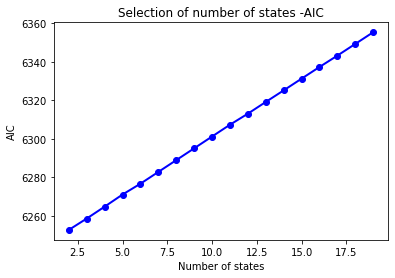

In [ ]:
plot(aic,'AIC')
# plot(bic,'BIC')
# plot(likelihood,'Log likelihood')